In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]
print(GPUs)
# XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 11.6 GB  | Proc size: 906.3 MB
GPU RAM Free: 14999MB | Used: 103MB | Util   1% | Total 15360MB


In [ ]:

import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [ ]:
cd "/content/drive/MyDrive/apple_variety"

/content/drive/MyDrive/apple_variety


In [ ]:
batch_size = 32
input_shape = (256, 256, 3)
image_size = (256, 256)

In [ ]:
train_dir = "/content/drive/MyDrive/apple_variety/datasaet_train_apple/"
test_dir = "/content/drive/MyDrive/apple_variety/dataset_test_apple/"
validate_dir = "/content/drive/MyDrive/apple_variety/dataset_validation_apple/"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    seed=42,
    subset='training',
    validation_split=0.2
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validate_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    seed=42,
    subset='validation',
    validation_split=0.2
)


test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode = 'categorical',
    batch_size=batch_size,
    image_size=(256, 256),
    seed = 42)

Found 4557 files belonging to 20 classes.
Using 3646 files for training.
Found 6655 files belonging to 20 classes.
Using 1331 files for validation.
Found 6669 files belonging to 20 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast, Rescaling

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset
)


Epoch 1/50
114/114 [==============================] - 1467s 12s/step - loss: 5.9666 - accuracy: 0.7644 - val_loss: 0.1913 - val_accuracy: 0.9204
Epoch 2/50
114/114 [==============================] - 25s 209ms/step - loss: 0.1253 - accuracy: 0.9600 - val_loss: 0.1021 - val_accuracy: 0.9782
Epoch 3/50
114/114 [==============================] - 22s 188ms/step - loss: 0.0836 - accuracy: 0.9753 - val_loss: 0.0065 - val_accuracy: 0.9992
Epoch 4/50
114/114 [==============================] - 23s 191ms/step - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.0148 - val_accuracy: 0.9955
Epoch 5/50
114/114 [==============================] - 24s 199ms/step - loss: 0.0650 - accuracy: 0.9789 - val_loss: 0.0097 - val_accuracy: 0.9955
Epoch 6/50
114/114 [==============================] - 22s 186ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 9.5651e-05 - val_accuracy: 1.0000
Epoch 7/50
114/114 [==============================] - 25s 202ms/step - loss: 7.3331e-05 - accuracy: 1.0000 - val_loss: 5.5198e

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


NameError: name 'model' is not defined

In [ ]:
model.save('fresh_try_pommelogy')

NameError: name 'model' is not defined

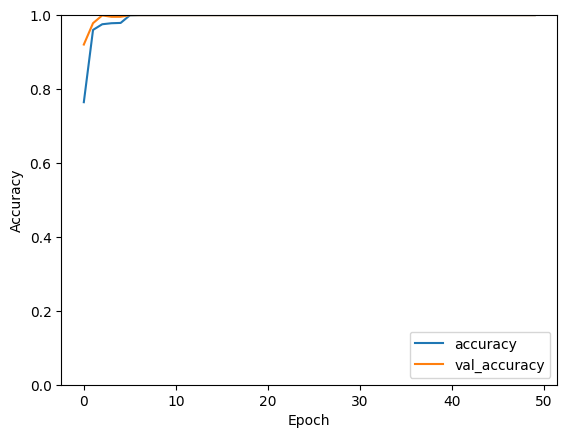

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
